In [1]:
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder,normalize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn import metrics

from sklearn.preprocessing import StandardScaler


from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:

os.environ["DATASET_DIRECTORY"] = "/content/datasets"
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/input"

In [4]:
!kaggle datasets download -d ahsan81/job-placement-dataset

Dataset URL: https://www.kaggle.com/datasets/ahsan81/job-placement-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/3.58k [00:00<?, ?B/s]
100% 3.58k/3.58k [00:00<00:00, 7.32MB/s]


In [5]:
!unzip \*.zip  && rm *.zip

Archive:  job-placement-dataset.zip
  inflating: Job_Placement_Data.csv  


In [6]:
df = pd.read_csv("Job_Placement_Data.csv",index_col = 0)
df.head(20)

,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
gender,,,,,,,,,,,,
M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed
M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed
M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed
M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed
F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed
M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed
M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed


In [9]:
print(df.info()) # boş veri var mı yok mu
print(df.status.unique()) # sınıflar
print(len(df.status.unique())) #kaç sınıf var

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, M to M
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ssc_percentage       215 non-null    float64
 1   ssc_board            215 non-null    object 
 2   hsc_percentage       215 non-null    float64
 3   hsc_board            215 non-null    object 
 4   hsc_subject          215 non-null    object 
 5   degree_percentage    215 non-null    float64
 6   undergrad_degree     215 non-null    object 
 7   work_experience      215 non-null    object 
 8   emp_test_percentage  215 non-null    float64
 9   specialisation       215 non-null    object 
 10  mba_percent          215 non-null    float64
 11  status               215 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.9+ KB
None
['Placed' 'Not Placed']
2


In [10]:
XSample = df.iloc[:,:-1] # Özellikler ayrıldı
ySample = df.status # Sınıf ayrıldı.

print(XSample)
print(ySample)

        ssc_percentage ssc_board  hsc_percentage hsc_board hsc_subject  \
gender                                                                   
M                67.00    Others           91.00    Others    Commerce   
M                79.33   Central           78.33    Others     Science   
M                65.00   Central           68.00   Central        Arts   
M                56.00   Central           52.00   Central     Science   
M                85.80   Central           73.60   Central    Commerce   
...                ...       ...             ...       ...         ...   
M                80.60    Others           82.00    Others    Commerce   
M                58.00    Others           60.00    Others     Science   
M                67.00    Others           67.00    Others    Commerce   
F                74.00    Others           66.00    Others    Commerce   
M                62.00   Central           58.00    Others     Science   

        degree_percentage undergrad_d

                     ssc_percentage  hsc_percentage  degree_percentage  \
ssc_percentage             1.000000        0.511472           0.538404   
hsc_percentage             0.511472        1.000000           0.434206   
degree_percentage          0.538404        0.434206           1.000000   
emp_test_percentage        0.261993        0.245113           0.224470   
mba_percent                0.388478        0.354823           0.402364   

                     emp_test_percentage  mba_percent  
ssc_percentage                  0.261993     0.388478  
hsc_percentage                  0.245113     0.354823  
degree_percentage               0.224470     0.402364  
emp_test_percentage             1.000000     0.218055  
mba_percent                     0.218055     1.000000  


<Axes: >

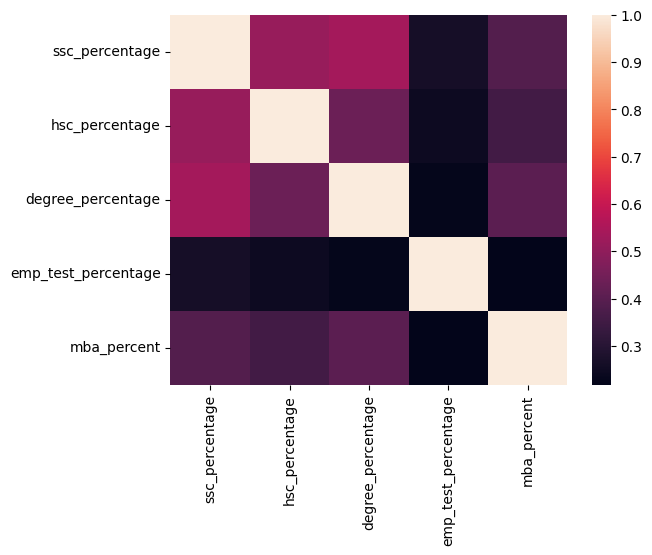

In [13]:
# Korelasyonu hesaplamadan önce yalnızca sayısal sütunları seçin
numerical_df = df.select_dtypes(include=['float', 'int'])
print(numerical_df.corr())
sns.heatmap(numerical_df.corr())

In [14]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

ySample = le.fit_transform(ySample)
print(ySample)

[1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0]


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in XSample:
  XSample[column] = le.fit_transform(XSample[column])

print(XSample)


        ssc_percentage  ssc_board  hsc_percentage  hsc_board  hsc_subject  \
gender                                                                      
M                   46          1              93          1            1   
M                   82          0              79          1            2   
M                   42          0              51          0            0   
M                   22          0              14          0            2   
M                   98          0              70          0            1   
...                ...        ...             ...        ...          ...   
M                   85          1              84          1            1   
M                   25          1              24          1            2   
M                   46          1              49          1            1   
F                   64          1              45          1            1   
M                   36          0              21          1            2   

In [16]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest = train_test_split(XSample,ySample,test_size=0.2,random_state=42)
print(XTrain.shape)
print(XTest.shape)
print(yTrain.shape)
print(yTest.shape)

(172, 11)
(43, 11)
(172,)
(43,)


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XTrain =sc.fit_transform(XTrain)
XTest = sc.fit_transform(XTest)
print(XTrain)
print(XTest)

[[-1.40350581 -0.96570403 -0.51526702 ... -0.02966009  1.13724814
  -1.26449621]
 [ 0.25510318 -0.96570403 -0.39609276 ... -1.52559898 -0.87931557
   0.0150745 ]
 [ 0.44358147 -0.96570403  1.3120717  ...  1.65806584 -0.87931557
   0.04874742]
 ...
 [-0.72498395 -0.96570403  0.31895283 ... -0.02966009 -0.87931557
  -0.47318275]
 [ 1.08440767 -0.96570403 -0.31664325 ...  0.31555658  1.13724814
   1.54719207]
 [ 0.93362504  1.03551396 -0.67416604 ... -1.14202491 -0.87931557
  -0.06910778]]
[[ 0.02112568  1.29903811 -1.11458842  0.97700842 -0.97700842 -0.38550487
  -0.71396984 -0.80860754  1.35925047 -0.93250481 -1.76206757]
 [-0.1681252   1.29903811  0.02328675  0.97700842 -0.97700842  0.97963591
  -0.71396984  1.23669388 -0.72530649 -0.93250481  1.33947684]
 [ 1.4594324   1.29903811 -0.52289333  0.97700842  1.02353263  0.97963591
   1.47893752  1.23669388  2.08082788 -0.93250481  1.55840938]
 [-0.92512874 -0.76980036 -1.11458842  0.97700842 -0.97700842 -1.75064566
  -0.71396984 -0.808607

# Decision tree

[1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 1]
[1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1]


[Text(0.7377873563218391, 0.9583333333333334, 'x[2] <= -1.502\ngini = 0.435\nsamples = 172\nvalue = [55, 117]'),
 Text(0.7147988505747126, 0.875, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.7607758620689655, 0.875, 'x[0] <= 0.754\ngini = 0.397\nsamples = 161\nvalue = [44, 117]'),
 Text(0.5905172413793104, 0.7916666666666666, 'x[5] <= -0.18\ngini = 0.46\nsamples = 120\nvalue = [43, 77]'),
 Text(0.41954022988505746, 0.7083333333333334, 'x[7] <= -0.451\ngini = 0.486\nsamples = 53\nvalue = [31, 22]'),
 Text(0.3103448275862069, 0.625, 'x[0] <= -0.132\ngini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(0.20689655172413793, 0.5416666666666666, 'x[9] <= -0.0\ngini = 0.334\nsamples = 33\nvalue = [26, 7]'),
 Text(0.11494252873563218, 0.4583333333333333, 'x[5] <= -0.565\ngini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.04597701149425287, 0.375, 'x[5] <= -0.951\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.022988505747126436, 0.2916666666666667, 'gini = 0.0\nsamples = 3\nv

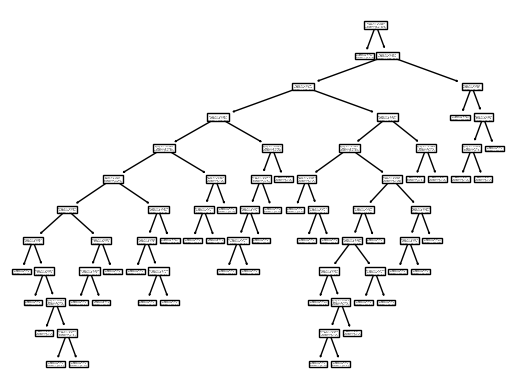

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifer = DecisionTreeClassifier(criterion="gini",splitter="random",random_state=15)
classifer.fit(XTrain,yTrain)
yTestPred =classifer.predict(XTest)
print(yTestPred)
print(yTest)
tree.plot_tree(classifer)

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.93      0.87      0.90        31

    accuracy                           0.86        43
   macro avg       0.82      0.85      0.83        43
weighted avg       0.87      0.86      0.86        43



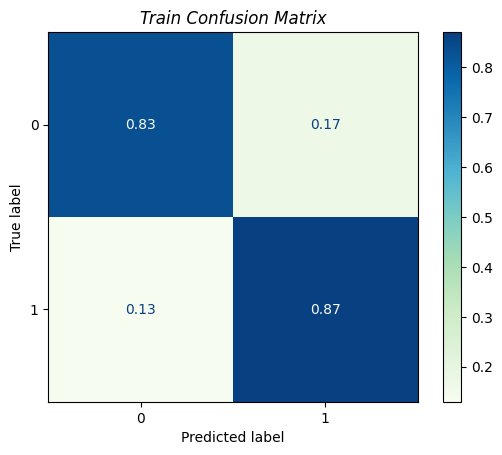

In [45]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt
print(classification_report(yTest,yTestPred))
cm = confusion_matrix(yTest,yTestPred,normalize = "true").round(2)
#cmn = cm.astype('float') / cm.sum(axis = 1) [:,np.newaxis]
#cmn = cmn.round
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp = disp.plot(cmap=plt.cm.GnBu,values_format = "g")
plt.title(f"Train Confusion Matrix",style ="italic")
plt.show()